TECH JOB ANALYSIS - [OCT 2024 - Mar 2025 (Last updated)] 

In [194]:
# Import all the libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
# Load the data from the Excel file
file_path = r'C:\Users\Kartikay\Desktop\Data Engineering Docs\Tech Jobs\all_jobs.xlsx'
data_csv = pd.read_excel(file_path, sheet_name='Sheet1')

In [196]:
# Added this Non-null, Count and data type
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94529 entries, 0 to 94528
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0.2           94529 non-null  int64         
 1   Unnamed: 0.1           94529 non-null  int64         
 2   Unnamed: 0             94529 non-null  int64         
 3   id                     94529 non-null  object        
 4   site                   94529 non-null  object        
 5   job_url                94529 non-null  object        
 6   job_url_direct         60491 non-null  object        
 7   title                  94529 non-null  object        
 8   company                93220 non-null  object        
 9   location               94086 non-null  object        
 10  job_type               51639 non-null  object        
 11  date_posted            94529 non-null  datetime64[ns]
 12  salary_source          72422 non-null  object        
 13  i

In [197]:
# Count of missing values per column
data_csv.isnull().sum()

Unnamed: 0.2                 0
Unnamed: 0.1                 0
Unnamed: 0                   0
id                           0
site                         0
job_url                      0
job_url_direct           34038
title                        0
company                   1309
location                   443
job_type                 42890
date_posted                  0
salary_source            22107
interval                 19340
min_amount               22106
max_amount               22107
currency                 19341
is_remote                30611
job_level                94524
job_function             94524
company_industry         79837
listing_type             60491
emails                   83725
description                  0
company_url              32271
company_url_direct       48697
company_addresses        51493
company_num_employees    51399
company_revenue          56952
company_description      61711
logo_photo_url           49456
banner_photo_url         59859
ceo_name

In [198]:
# Drop the unnecessary columns
data_csv = data_csv.drop(['Unnamed: 0.2','Unnamed: 0.1', 'Unnamed: 0','job_level','job_function','company_addresses', 'company_num_employees', 'company_revenue', 'company_description', 'logo_photo_url', 'banner_photo_url','ceo_name','ceo_photo_url'], axis=1)
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94529 entries, 0 to 94528
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   94529 non-null  object        
 1   site                 94529 non-null  object        
 2   job_url              94529 non-null  object        
 3   job_url_direct       60491 non-null  object        
 4   title                94529 non-null  object        
 5   company              93220 non-null  object        
 6   location             94086 non-null  object        
 7   job_type             51639 non-null  object        
 8   date_posted          94529 non-null  datetime64[ns]
 9   salary_source        72422 non-null  object        
 10  interval             75189 non-null  object        
 11  min_amount           72423 non-null  float64       
 12  max_amount           72422 non-null  float64       
 13  currency             75188 non-

Goal - 1 - Gain insights on job type

In [199]:
data_csv['job_type'].value_counts()

fulltime                                               43156
contract                                                4007
fulltime, contract                                      1462
parttime                                                 801
internship                                               713
parttime, fulltime                                       426
fulltime, internship                                     255
other                                                    166
temporary                                                151
temporary, fulltime                                      106
parttime, contract                                        73
temporary, contract                                       68
parttime, fulltime, contract                              49
parttime, internship                                      41
temporary, fulltime, contract                             34
parttime, fulltime, internship                            28
temporary, parttime     

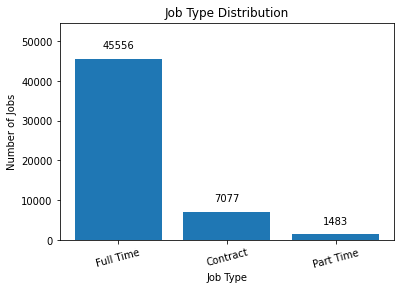

In [200]:
data_csv_job = data_csv.copy()

def categorize_job_type(job):
    job = str(job).lower()
    categories = []

    if 'full' in job:
        categories.append('Full Time')
    if 'part' in job:
        categories.append('Part Time')
    if 'temporary' in job or 'contract' in job or 'internship' in job:
        categories.append('Contract')

    return categories 

# Apply function to your DataFrame
data_csv_job['job_category'] = data_csv_job['job_type'].apply(categorize_job_type)

# Explode to separate rows if multiple categories per job
data_csv_job = data_csv_job[data_csv_job['job_category'].apply(bool)]  # Remove empty lists
data_csv_exploded = data_csv_job.explode('job_category')
job_type_counts = data_csv_exploded['job_category'].value_counts()

# Plotting
bars = plt.bar(job_type_counts.index, job_type_counts.values)
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.xticks(rotation=15)
plt.bar_label(bars, labels=job_type_counts.values, padding=8, fontsize=10)
plt.ylabel('Number of Jobs')
plt.ylim(0, max(job_type_counts.values) * 1.2)
plt.show()


Goal - 2 - Job location


In [201]:
data_csv_location = data_csv.copy()

#Dropped null location values
data_csv_location = data_csv_location.dropna(subset=['location'])

#Splitting of location column in city, state and country
data_csv_location[['City','State','Country']] = data_csv_location['location'].str.rsplit(',', n=2,expand=True)

#Removal of whitespaces
data_csv_location['Country'] = data_csv_location['Country'].str.strip()
#data_csv_location[['City','State','Country']].value_counts().head(50)
data_csv_location['Country'].unique()

def countryCleaning(country):
    if country == 'USA':
        return 'US'


data_csv_location['Country'].apply(countryCleaning)

data_csv_location['Country'] = data_csv_location['Country'].fillna('US')
data_csv_location['Country'] = data_csv_location['Country'].replace('US','USA')
data_csv_location = data_csv_location[data_csv_location['Country'].isin(['USA'])]
data_csv_location['Country'].value_counts()
data_csv_location['State'] = data_csv_location['State'].str.strip()
data_csv_location['State'] = data_csv_location['State'].replace('US', 'Remote')
job_loaction = data_csv_location['State'].value_counts().head(10)
print(job_loaction)


#data_csv['location'].apply(lambda x: len(str(x).split(','))).value_counts()


CA        16998
TX         8503
Remote     7266
VA         5543
WA         5198
NY         3557
MD         2900
CO         2806
FL         2792
IL         2456
Name: State, dtype: int64


<Figure size 1800x720 with 0 Axes>

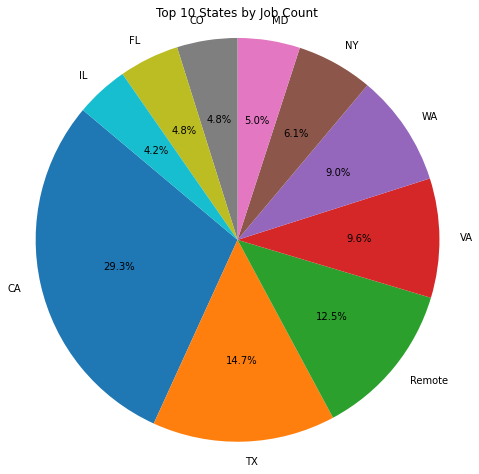

"\nplt.title('Job Type Distribution')\nplt.xlabel('States')\n#plt.bar_label(bars, labels=job_loaction.values, padding=8, fontsize=10, rotation=90)\nplt.ylabel('Number of Jobs')\nplt.ylim(0, max(job_loaction.values) * 1.2)\nplt.show()\n"

In [202]:
plt.figure(figsize=(25, 10)) 
#bars = plt.bar(job_loaction.index, job_loaction.values)
plt.figure(figsize=(8, 8))
plt.pie(
    job_loaction.values,
    labels=job_loaction.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 10 States by Job Count')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()
'''
plt.title('Job Type Distribution')
plt.xlabel('States')
#plt.bar_label(bars, labels=job_loaction.values, padding=8, fontsize=10, rotation=90)
plt.ylabel('Number of Jobs')
plt.ylim(0, max(job_loaction.values) * 1.2)
plt.show()
'''